# Liveability scoring
Liveability score is essential to measure the importance of various factors consisted of liveability.
<br>
In this project, it is decided to use customized weights by conducting user survey via web service and scoring the liveability based on the weights.
<br>

- First, standardizate the different measurements.
- Second, Rank them by categories.
- Finally, Score and weight them.

## Read the data

In [90]:
import pandas as pd
COL = ["min_distance_to_train", "min_distance_to_hosp", "min_distance_to_poli", "min_distance_to_shop", "gdp(USD Millioins)", "saving_rate(% of GDP)", "population_density", "crime_cases", "weekly_rent"]
sample = pd.read_csv("../../data/curated/merged_dataset/2013_merged_data.csv")
m = sample[COL].to_numpy()
m

array([[3.556825e+01, 2.135025e+01, 2.204660e+01, ..., 8.533000e+03,
        8.600000e+01, 3.000000e+02],
       [7.543550e+00, 7.429720e+00, 6.281770e+00, ..., 1.373900e+04,
        3.600000e+01, 2.150000e+02],
       [5.085341e+01, 3.663541e+01, 8.478000e-02, ..., 8.533000e+03,
        8.600000e+01, 1.750000e+02],
       ...,
       [1.288061e+01, 1.272350e+01, 1.525938e+01, ..., 1.114100e+04,
        5.424000e+03, 3.500000e+02],
       [5.286500e-01, 2.290756e+01, 2.693800e-01, ..., 8.564000e+03,
        1.140000e+02, 2.250000e+02],
       [         nan,          nan,          nan, ..., 5.269000e+03,
        2.100000e+01, 2.000000e+02]])

In [91]:
from sklearn import preprocessing
import numpy as np

## Data standardization

In [114]:
X_train = m
scaler = preprocessing.StandardScaler().fit(X_train)
# scaler
# scaler.mean_
# scaler.scale_

plot histogram

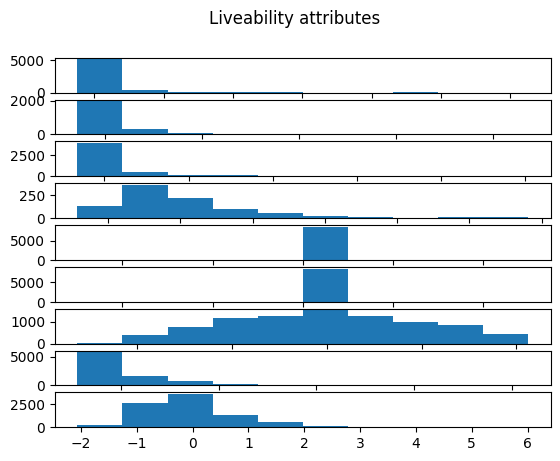

In [115]:
import matplotlib.pyplot as plt
X_scaled = scaler.transform(X_train)
X_scaled
fig, axs = plt.subplots(X_scaled.shape[1])
fig.suptitle('Liveability attributes')
for i in range(0, X_scaled.shape[1]):
    axs[i].hist(X_scaled[:,i])
plt.show()

<b>QQ-plot</b>
<br>
- In QQ-plot, there are strong evidences that most of liveability attributes are not normally distributed.
<br>
- 6th attribute has normal distribution but it is under-dispersed (more concentrated around a central value).
<br>
- Therefore, it is not recommanded to standardise using normal distribution.

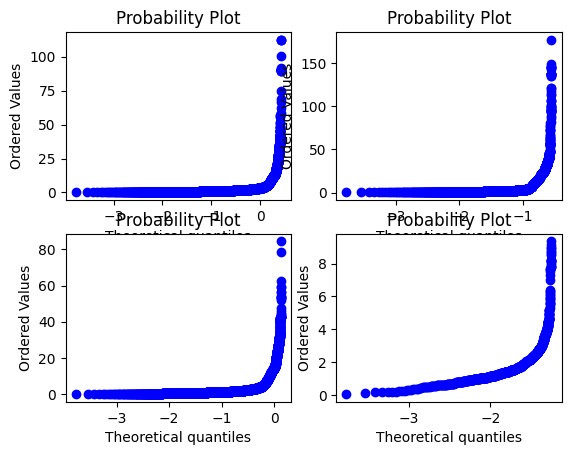

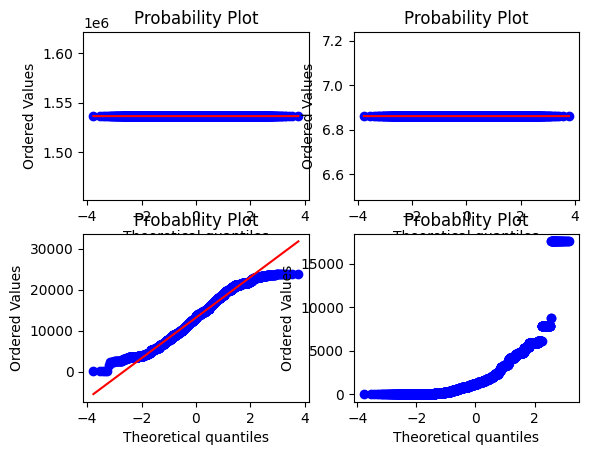

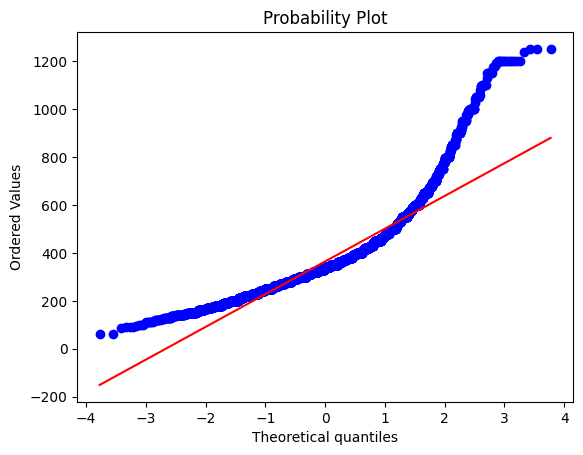

In [134]:
import numpy as np
import scipy.stats as stats
import pylab

# test = np.random.normal(0,1, 1000) # Good example
for i in range(0, 4):
    ax1 = plt.subplot(221+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

for i in range(4, 8):
    ax1 = plt.subplot(217+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

measurements = sample[COL[X_scaled.shape[1]-1]].to_numpy()
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


QQ-plot expanded <b>(Log-model)</b>
- Relatively, it doesn't seem to fit well.

/var/folders/sm/l6vrftmd479f6k9xsr1dflsr0000gn/T/ipykernel_25933/3085801141.py:7: RuntimeWarning: invalid value encountered in log
  sm.qqplot(np.log(test), line='45')
/var/folders/sm/l6vrftmd479f6k9xsr1dflsr0000gn/T/ipykernel_25933/3085801141.py:7: RuntimeWarning: divide by zero encountered in log
  sm.qqplot(np.log(test), line='45')


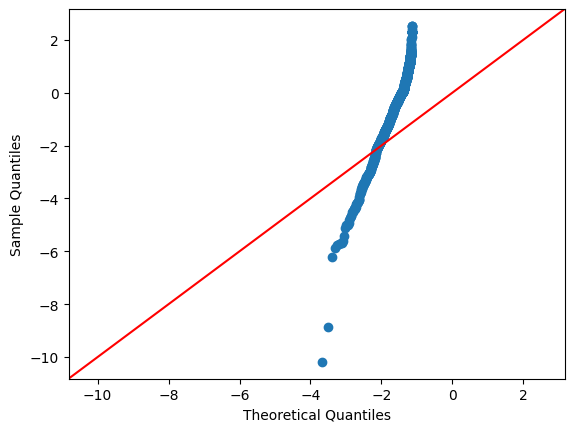

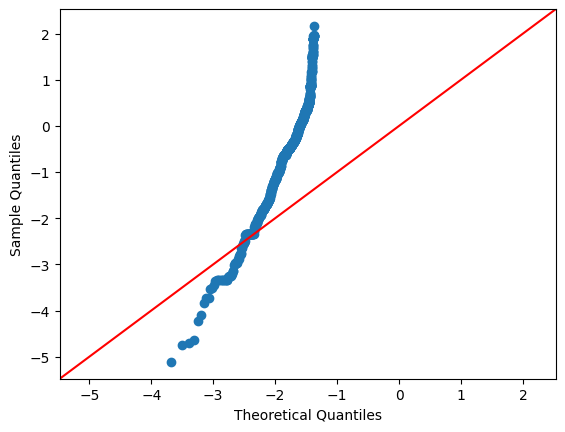

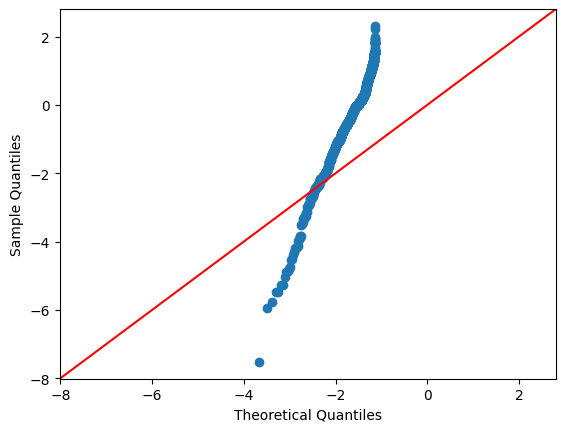

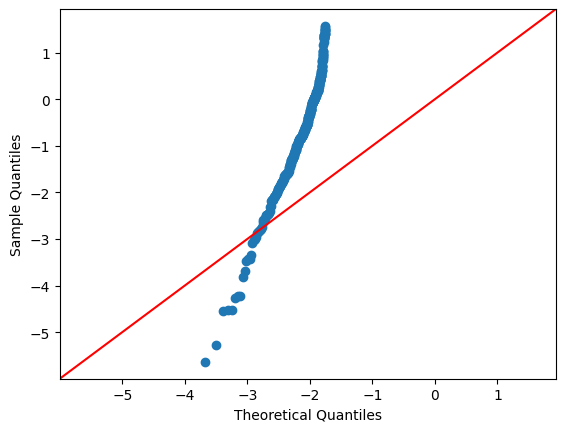

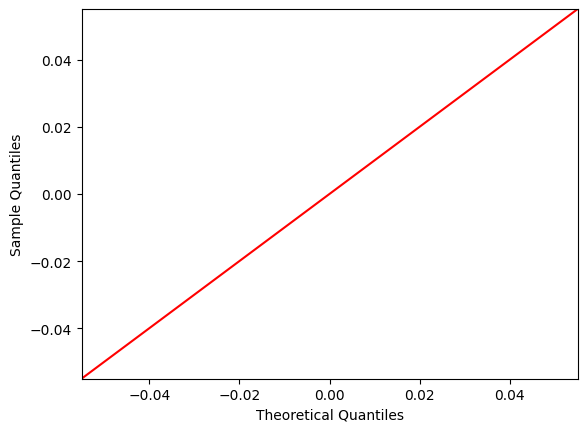

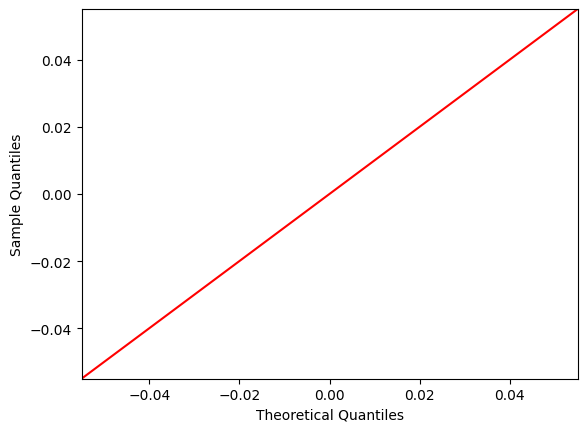

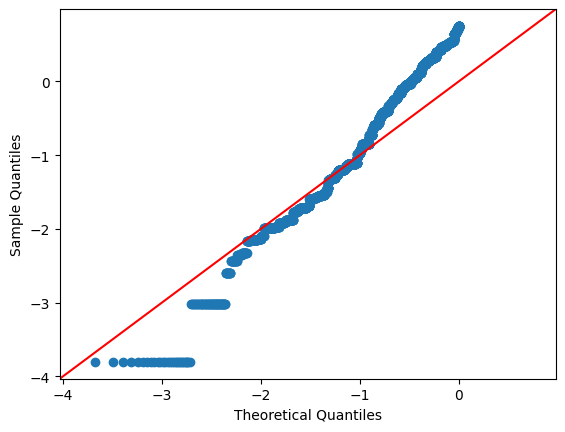

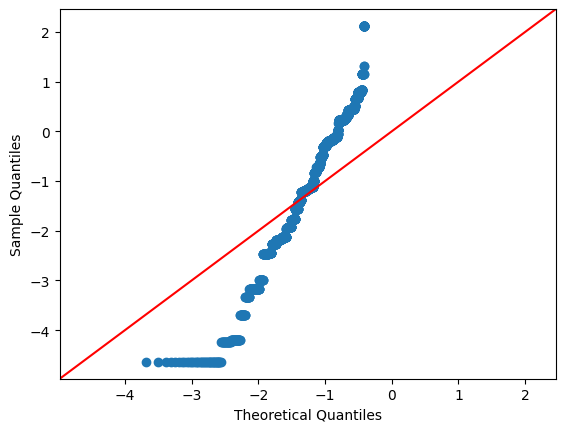

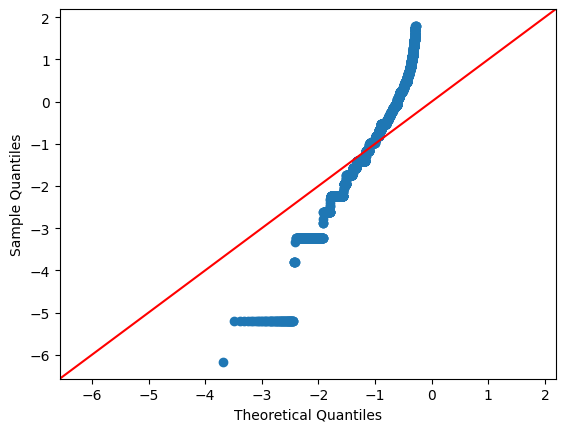

In [138]:
import numpy as np 
import statsmodels.api as sm
import pylab

for i in range(0, X_scaled.shape[1]):
    test = X_scaled[:,i]
    sm.qqplot(np.log(test), line='45')
pylab.show()
    

## Ranking

## Scoring